In [2]:
import matplotlib.pyplot as plt 
import pickle 
import matplotlib as mpl 
import numpy as np 

In [3]:
with open("DDPG_MDP.pkl", "rb") as f: 
    data = pickle.load(f)[1]
# data

In [4]:
histories = data["test_history"]
rewards = data["rewards"]

SOC_trajectories = []
for history in histories: 
    SOC_trajectory = history["SOC"]
    SOC_trajectories.append(SOC_trajectory)

fuel_trajectories = []
for history in histories: 
    fuel_trajectory = history["m_fuel"]
    fuel_trajectories.append(fuel_trajectory)
    
    

In [5]:
print(len(histories))

40


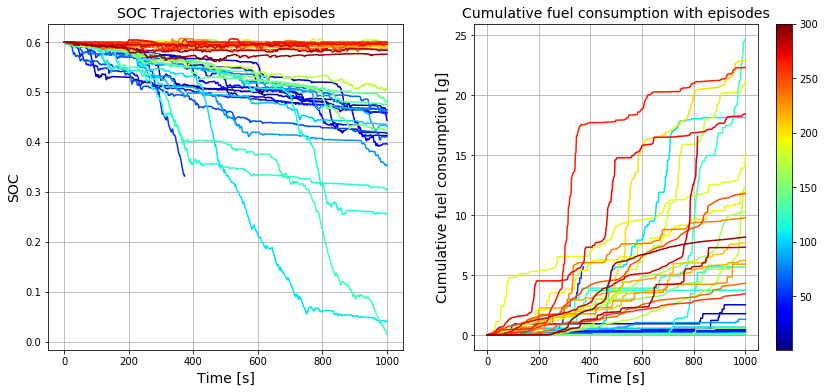

In [6]:
fig = plt.figure(figsize=(14, 6))

cmap = plt.get_cmap('jet')
norm = mpl.colors.Normalize(vmin=1, vmax=300)

plt.subplot(1, 2, 1)
for i, SOC_trajectory in enumerate(SOC_trajectories[:300]): 
    color = cmap(float(i) / len(SOC_trajectories))
    plt.plot(SOC_trajectory, c=color)
    plt.ylabel("SOC", fontsize=14)
    plt.xlabel("Time [s]", fontsize=14)
    plt.title("SOC Trajectories with episodes", fontsize=14)
plt.grid() 

plt.subplot(1, 2, 2)
for i, fuel_trajectory in enumerate(fuel_trajectories[:300]): 
    color = cmap(float(i) / len(SOC_trajectories))
    fuel_trajectory = np.cumsum(fuel_trajectory)
    plt.plot(fuel_trajectory, c=color)
    plt.ylabel("Cumulative fuel consumption [g]", fontsize=14)
    plt.xlabel("Time [s]", fontsize=14)
    plt.title("Cumulative fuel consumption with episodes", fontsize=14)
plt.grid() 
    
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap))
plt.savefig("training process.png")

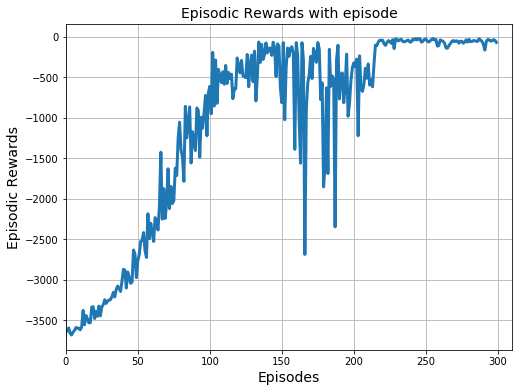

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(rewards[:300], linewidth=3)
plt.ylabel("Episodic Rewards", fontsize=14)
plt.xlabel("Episodes", fontsize=14)
plt.title("Episodic Rewards with episode", fontsize=14)
plt.xlim([0, 310])
plt.grid() 
plt.savefig("Episodic Rewards.png")